In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from PIL import Image
import os

def convert_images_to_png(folder_path):
    # Ensure the folder path ends with a slash
    folder_path = folder_path.rstrip("/") + "/"

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can extend the list of supported extensions)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tif')):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, file_name)

            # Open the image
            img = Image.open(image_path)

            # Construct the new file name with a .png extension
            new_file_name = os.path.splitext(file_name)[0] + ".png"
            new_image_path = os.path.join(folder_path, new_file_name)

            # Save the image in PNG format
            img.save(new_image_path, "PNG")

            # Optionally, you can remove the original image
            os.remove(image_path)

            print(f"Converted: {file_name} -> {new_file_name}")


folder_path = r"C:\Users\franc\OneDrive - University Of Houston\AAA_RECTDNN\data\FLNN\in\\"
convert_images_to_png(folder_path)


Converted: 4802960090B.jpg -> 4802960090B.png
Converted: 4802960095C.jpg -> 4802960095C.png
Converted: 4802960125B.jpg -> 4802960125B.png
Converted: 4802960130B.jpg -> 4802960130B.png


C:\Users\franc\anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (108659607 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Converted: 48039C0035I.tif -> 48039C0035I.png


C:\Users\franc\anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (120377367 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Converted: 48201C0220J.tif -> 48201C0220J.png


In [2]:
input_path = r"C:\Users\franc\OneDrive - University Of Houston\AAA_RECTDNN\data\FLNN\ZZZ_Preprocess\prep\ZoneA\48039C0035I_p.png"
img = np.asarray(Image.open(input_path))
# plt.hist(img[:, :, 1].flatten())

C:\Users\franc\anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (108659607 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(array([1.0029000e+04, 9.6593384e+07, 2.2510000e+03, 1.8520000e+03,
        2.1100000e+03, 2.1240000e+03, 3.1050000e+03, 3.2730000e+03,
        4.8060000e+03, 1.2036673e+07]),
 array([ 30. ,  52.3,  74.6,  96.9, 119.2, 141.5, 163.8, 186.1, 208.4,
        230.7, 253. ]),
 <BarContainer object of 10 artists>)

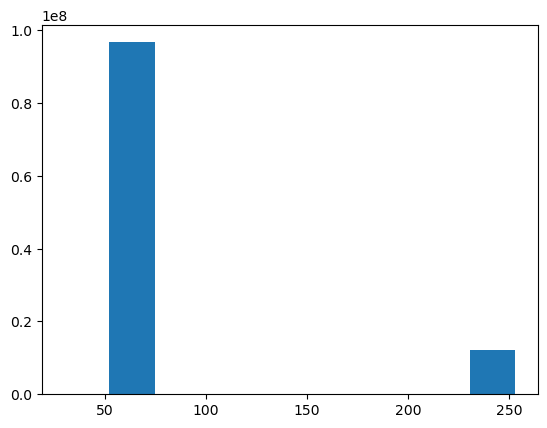

In [3]:
plt.hist(img[:, :, 0].flatten())
# plt.hist(img[:, :, 1].flatten())
# plt.hist(img[:, :, 2].flatten())

In [9]:
def process_image(input_path, output_folder_red, output_folder_green, threshold=66):
    # Open the image
    img = np.asarray(Image.open(input_path))
    # whitemask = np.sum(img, axis=2) > threshold * 3
    whitemask = img[:, :, 2] > 0

    # Create output folders if they don't exist
    os.makedirs(output_folder_red, exist_ok=True)
    os.makedirs(output_folder_green, exist_ok=True)
    
    red = img[:, :, 0].copy()
    red[whitemask] = 0
    red[red < 100] = 0
    red[red > 100] = 255
    red = red.astype(np.uint8)
    # plt.hist(red.flatten())
    Image.fromarray(red).save(os.path.join(output_folder_red, os.path.basename(input_path)[:-3] + "png"))
    '''plt.imsave(
        os.path.join(output_folder_red, os.path.basename(input_path)[:-3] + "png"),
        red)
    green = img[:, :, 0].copy()
    green[whitemask] = 0
    green[green > 100] = 0
    green = green / np.max(green) * 255
    plt.imsave(
        os.path.join(output_folder_green, os.path.basename(input_path)[:-3] + "png"),
        green)'''
    green = img[:, :, 0].copy()
    green[whitemask] = 0
    green[green > 100] = 0
    green = np.uint8(green / np.max(green) * 255)
    Image.fromarray(green).save(os.path.join(output_folder_green, os.path.basename(input_path)[:-3] + "png"))
    
input_folder = r"C:\Users\franc\OneDrive - University Of Houston\AAA_RECTDNN\data\FLNN\ZZZ_Preprocess\prep\\"
output_folder_red = r"C:\Users\franc\OneDrive - University Of Houston\AAA_RECTDNN\data\FLNN\ZZZ_Preprocess\prep\ZoneA\\"
output_folder_green = r"C:\Users\franc\OneDrive - University Of Houston\AAA_RECTDNN\data\FLNN\ZZZ_Preprocess\prep\ZoneX\\"

# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        input_path = os.path.join(input_folder, filename)
        process_image(input_path, output_folder_red, output_folder_green)